# <span style="color:blue">Machine Larning : Problèmes de classification</span>.

La classification est une tâche très répandue en Machine Learning. Dans ce genre de problématique, on cherche à mettre une étiquette (un label) sur une observation: 

*Exemple : une tumeur est-elle maligne ou non, une transaction est- elle frauduleuse ou non… ces deux cas sont des exemples de classification.*

Quand on a deux choix d’étiquettes possibles (tumeur maligne ou non), on parle de Binary Classification (classification binaire). Par ailleurs, l’étiquette Y aura deux valeurs possibles 0 ou 1. En d’autres termes Y  $\in \{0,1 \}$.

Dans ce laboratoire, nous allons voir deux algorithmes de classification:
1. Regréssion logistique
1. KNN (K Nearest Neighbors)

## <span style="color:green"> I) Regréssion logistique </span>.
### I-1) Lecture  des données et visualisation de distributions

Nous examinerons un ensemble de données comprenant des enregistrements d'achats de polices d'assurance vie en fonction de l'âge.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
df = pd.read_csv("./datasets/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Visualisation de la distribution de la variables continue `age` dans chacune des catégories de la variable qualitative `bought_insurance` 

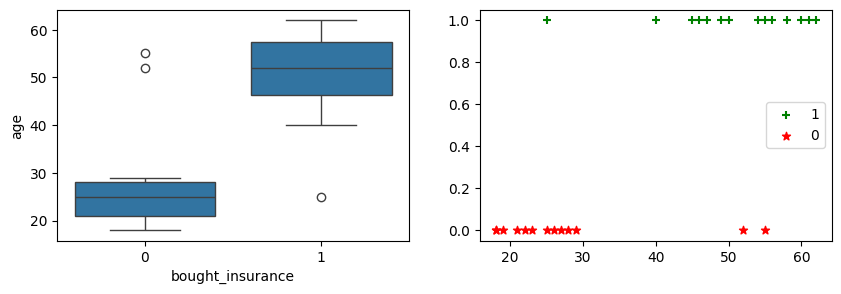

In [3]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1) # row 1, col 1 index 1
sns.boxplot(x='bought_insurance', y='age', data=df) # la fonction boxplot() du package seaborn montre la distribution de la variable age dans les classe de bought_insurance.

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.scatter(x="age", y="bought_insurance", data=df[df.bought_insurance==1],marker='+',color='green')
plt.scatter(x="age", y="bought_insurance", data=df[df.bought_insurance==0],marker='*',color='red')
plt.legend(["1", "0"], loc='center right')

plt.show()

### I-2) Construction du modèle de regression logistique

In [4]:
X=df[['age']]
y=df.bought_insurance

X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)
model = LogisticRegression() # Instancier un objet
model.fit(X_train, y_train)  # construire le modèle sur les données d'apprentissage

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### a - *Affichage des paramettres et du score du modèle*

In [5]:
print("la constante  du modèle beat_0 = ", model.intercept_)
print("le coeffcient du modèle beat_1 = ", model.coef_[0])
print("la performance du modèle sur les données d'apprentissage = ", model.score(X_train, y_train))
print("la performance du modèle sur les données de test         = ", model.score(X_test, y_test))

la constante  du modèle beat_0 =  [-5.82346345]
le coeffcient du modèle beat_1 =  [0.1521352]
la performance du modèle sur les données d'apprentissage =  0.9047619047619048
la performance du modèle sur les données de test         =  0.8333333333333334


#### b- *Calcul des `probabilités` pour les classes de la variable target bought_insurance par la fonction `predict_proba()`*

In [6]:
print("les probabilités relatives aux classes : ", model.classes_)
print(model.predict_proba(X_test))

les probabilités relatives aux classes :  [0 1]
[[0.0474088  0.9525912 ]
 [0.16367135 0.83632865]
 [0.07283247 0.92716753]
 [0.94944879 0.05055121]
 [0.26451729 0.73548271]
 [0.23599646 0.76400354]]


In [7]:
# Affichage plus lisible des probabilités 
pd.DataFrame(model.predict_proba(X_test), columns=["Proba (y=0/x)", "Proba (y=1/x)"])

,Proba (y=0/x),Proba (y=1/x)
0,0.047409,0.952591
1,0.163671,0.836329
2,0.072832,0.927168
3,0.949449,0.050551
4,0.264517,0.735483
5,0.235996,0.764004


#### c- *Calcul des `classes` de la variable target bought_insurance par la fonction `predict()`*

Ici, chaque observation des données de test est affectée à la classe dont la probabilité est supérieure au **seuil** de classification($0,5$ par défaut)

In [8]:
y_predicted = model.predict(X_test)
print("Les classes prédites par le modèles pour les données test : \n", y_predicted)

Les classes prédites par le modèles pour les données test : 
 [1 1 1 0 1 1]


In [9]:
# Affichage plus lisible des classes
pd.DataFrame({'y_test': y_test, 'y_predicted': y_predicted})

,y_test,y_predicted
17,1,1
14,1,1
6,0,1
18,0,0
23,1,1
4,1,1


### I-3) Evaluation du modèle de regression logistique
#### a- La matrice de confusion


`La matrice de confusion` est un outil qui permet d'évaluer la qualité des prédictions en comparant les données *réelles* avec *les prédictions du modèle*.

|                | Prédit Négatif | Prédit Positif |
|----------------|-----------------|-----------------|
| Réellement Négatif | True  Negarive (**TN**)| False Psitive (**FP**)|
| Réellement Positif | False Negarive (**FN**)| True Psitive (**TP**) |

- True positive  (TP) : Les données réellement positifs que le modèle a correctement classés comme positifs.
- True négative  (TN) : Les données réellement négatifs que le modèle a correctement classés comme négatifs.
- False positive (FP) : Les données réellement négatifs que le modèle a incorrectement classés comme positifs (erreur de type I).
- False négative (FN) : Les données réellement positifs que le modèle a incorrectement classés comme négatifs (erreur de type II).

In [ ]:
confusion_matrix(y_test, y_predicted)

#### b- Les indicateurs de performance de la classification


Les métriques de classification, telles que le rappel (recall), la spécificité (specificity) et la précision (precision), sont utilisées pour évaluer la performance d'un modèle de classification. Voici comment ces métriques sont calculées :

1. **Accuracy** : Le pourcentage de prédictions correctes parmi toutes les prédictions.
    **Accuracy= (TP+TN) / (TP+TN+FP+FN)**

1. **Rappel (Recall ou Sensibilité)** : Le rappel mesure la capacité du modèle à identifier tous les exemples positifs réels. Il est calculé comme le rapport des vrais positifs (VP) sur la somme des vrais positifs et des faux négatifs (FN).
    **Rappel= TP / (TP+FN)**
​
1. **Spécificité** : La spécificité mesure la capacité du modèle à identifier tous les exemples négatifs réels. Elle est calculée comme le rapport des vrais négatifs (VN) sur la somme des vrais négatifs et des faux positifs (FP).
    **Spécificité = TN / (TN+FP)**

1. **Précision** : La précision mesure la précision des prédictions positives du modèle. Elle est calculée comme le rapport des vrais positifs (VP) sur la somme des vrais positifs et des faux positifs (FP).
    **Précision= TN / (TP+FP)**
​


In [ ]:
print("Scores d'évaluation avec un seuil de classification de 0.5:") 
print("Accuracy  :", round(accuracy_score(y_test, y_predicted),(3)))
print("Precision :", precision_score(y_test, y_predicted)) 
print("Recall    :", recall_score(y_test, y_predicted))

In [ ]:
print(classification_report(y_test, y_predicted))

#### C - La courbe ROC et la mesure roc_auc_score()`

La courbe ROC est une représentation graphique du compromis entre le taux de vrais positifs $(TPR= TP / (TP+FN))$ et le taux de faux positifs $(FPR= FP / (TN+FP))$ **pour différentes valeurs de seuil**.    

La courbe ROC montre à quel point le modèle peut faire la distinction entre les deux classes. **Elle sert à évaluer un modèle de classification indépendament du seuil de classification.**

In [ ]:
FPR, TPR, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 

plt.figure(figsize=(5, 3))
plt.plot(FPR, TPR)
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC du modèle Logistique obtenu') 
plt.show()

**Le modèle de classification idéal est celui dont le taux de vrais positifs tend vers $1$ et le taux de faux positifs tend vers $0$, Autrement dit, celui dont la courbe ROC se rapproche du coin supérieur gauche du graphique.**

##### La `fonction roc_auc_score()` est une métrique d'évaluation qui mesure l'aire sous la courbe ROC (AUC-ROC), et qui représente la capacité du modèle à distinguer entre les classes.

In [14]:
print('l aire sous la courbe ROC (AUC-ROC) est :', roc_auc_score(y_test, model.predict_proba(X_test)[:,1])) 

l aire sous la courbe ROC (AUC-ROC) est : 0.625


## <span style="color:green"> II) Nearest Neighbors Classification </span>.

 Le principe derrière cet algorithm est, pour un paramètre $k$ définit par l'utilisateur,  trouver les $k$ points de l'échantillant d'apprentissage les plus proches du point que l'on cherche à classer.  
 La classification est calculée à partir d'un vote simple de ces $k$ points; i.e Le point à classer se voit attribuer la classe la plus fréquentes parmi ses $k$ plus proches voisins.

 <font size="4">$$P(y=k|x_{1}, x_{2}, ..., x_{p}) = \frac{1}{K}{\sum_{i\in voisinage}I(y_i=k)}$$</font>

$$k \in (1,2,...,𝐾) $$

II-1) Application : Nearest Neighbors Classification
-------------------
Apprentissage d'un le modèle `KNN(5)` avec $K=5$

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

II-1) Ajustement de  l'hyperparamètre K par la validation croisée

In [ ]:
param_grid = {'n_neighbors': range(1, 10)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("le meilleur Hyperparameter k:", grid.best_params_)
print("Le meilleur score d'accuracy:", grid.best_score_)

L'objet retourné par `GridSearchCV()` contient plusieurs informations utiles sur la recherche sur la grille effectuée, y compris les résultats des différents modèles entraînés avec différentes combinaisons d'hyperparamètres.

Voici quelques-uns des attributs principaux de l'objet retourné par GridSearchCV :

1. best_params_ : Dictionnaire contenant les meilleurs hyperparamètres trouvés pendant la recherche sur la grille.

1. best_estimator_ : Le meilleur modèle trouvé avec les meilleurs hyperparamètres.

1. best_score_ : La meilleure précision moyenne obtenue sur les données de validation croisée pour le meilleur modèle.

1. cv_results_ : Un dictionnaire qui contient les résultats détaillés de la recherche sur la grille, y compris les scores, les temps d'exécution, et d'autres informations.

Ci-après une exploration du contenu de l'attribut `cv_results_`

In [17]:
scores = grid.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000801,0.000205,0.001186,0.000111,1,{'n_neighbors': 1},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1
1,0.000603,0.000085,0.000882,0.000076,2,{'n_neighbors': 2},0.8,1.0,1.0,0.50,0.50,0.76,0.224499,9
2,0.000518,0.000030,0.000831,0.000037,3,{'n_neighbors': 3},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1
3,0.000503,0.000032,0.000855,0.000044,4,{'n_neighbors': 4},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1
4,0.000501,0.000019,0.000801,0.000015,5,{'n_neighbors': 5},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1
5,0.000517,0.000064,0.000891,0.000096,6,{'n_neighbors': 6},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1
6,0.000524,0.000051,0.000818,0.000034,7,{'n_neighbors': 7},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1
7,0.000499,0.000072,0.001086,0.000236,8,{'n_neighbors': 8},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1
8,0.000464,0.000028,0.000889,0.000037,9,{'n_neighbors': 9},0.8,1.0,1.0,0.75,0.75,0.86,0.115758,1


II-1) Création du meilleur modèle KNN

In [18]:
print("La meilleur valeur de k est :", list(grid.best_params_.values())[0])

La meilleur valeur de k est : 1


In [19]:
X=df[['age']]
y=df[['bought_insurance']]
best_k = list(grid.best_params_.values())[0]
knn = KNeighborsClassifier(n_neighbors=best_k) #Instancier un objet et définir les paramètres

knn.fit(X, y)


/home/theslender/anaconda3/envs/all_purpose/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## <span style="color:green"> III) Comparaison des modèles obtenus par KNeighborsClassifier() et LogisticRegression()</span>.

### III-1) La courbe ROC

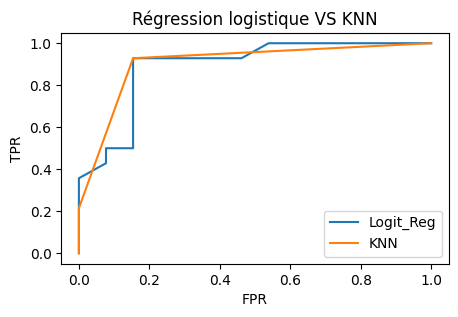

In [20]:
X= df[['age']]
y= df.bought_insurance 
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.7)

logitR = LogisticRegression() # Instancier un objet
logitR.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5) #Instancier un objet et définir les paramètres
knn.fit(X_train, y_train)

FPR_lr,  TPR_lr,  thresholds = roc_curve(y, logitR.predict_proba(X)[:,1]) 
FPR_knn, TPR_knn, thresholds = roc_curve(y, knn.predict_proba(X)[:,1]) 

plt.figure(figsize=(5, 3))

plt.plot(FPR_lr, TPR_lr)
plt.plot(FPR_knn, TPR_knn)
plt.legend(["Logit_Reg", "KNN"])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Régression logistique VS KNN') 
plt.show()

### III-2) Le score AUR-ROC

**Rappel**

La courbe ROC (Receiver Operating Characteristic) est un graphique représentant la performance d'un modèle de classification à différents seuils de probabilité.    

L'AUC-ROC mesure l'aire sous cette courbe, fournissant ainsi un seul nombre qui résume la performance du modèle sur l'ensemble du spectre des seuils de classification. 

Une valeur d'AUC-ROC proche de 1 indique une excellente performance, tandis qu'une valeur proche de 0,5 indique une performance équivalente au hasard.

L'AUC-ROC se calcule par la fonction `roc_auc_score()`

In [21]:
print('Régression logistique AUC-ROC :', roc_auc_score(y_test, logitR.predict_proba(X_test)[:,1])) 

print('KNN AUC-ROC                   :', roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])) 

Régression logistique AUC-ROC : 0.8333333333333334
KNN AUC-ROC                   : 0.7777777777777779


# Travail à faire:
Le travail consiste à construire un modèle capable d’identifier automatiquement des emails potentiellement frauduleux (phishing) à partir de caractéristiques extraites du contenu et des métadonnées (`phishing_email.csv`)

Dans ce travail, vous êtes invités à mettre en pratique l’ensemble de la chaîne Data Science :
- prétraitement (standardisation, encodage, visualisations),
- construction et comparaison de modèles (Régression Logistique, KNN),
- amélioration du modèle (PolynomialFeatures, GridSearchCV, Pipeline, SFS),
- gestion d’un dataset déséquilibré et choix d’un seuil optimal.

In [77]:
data = pd.read_csv("datasets/phishing_emails.csv")
data.head()

,nb_mots,nb_liens,nb_mots_sensibles,score_html,est_reponse,domaine_expediteur,jour_semaine,label
0,134,0,0,0.462974,0,inconnu,Samedi,0
1,115,0,0,0.909625,0,gmail.com,Vendredi,0
2,139,1,1,0.426603,0,outlook.com,Mardi,0
3,165,1,1,0.629844,1,gmail.com,Mardi,0
4,112,3,0,0.035351,1,yahoo.com,Dimanche,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nb_mots             5000 non-null   int64  
 1   nb_liens            5000 non-null   int64  
 2   nb_mots_sensibles   5000 non-null   int64  
 3   score_html          5000 non-null   float64
 4   est_reponse         5000 non-null   int64  
 5   domaine_expediteur  5000 non-null   object 
 6   jour_semaine        5000 non-null   object 
 7   label               5000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 312.6+ KB


In [79]:
data.isnull().sum()

nb_mots               0
nb_liens              0
nb_mots_sensibles     0
score_html            0
est_reponse           0
domaine_expediteur    0
jour_semaine          0
label                 0
dtype: int64

In [ ]:
numerical_cols = ['nb_mots', 'nb_liens', 'nb_mots_sensibles', 'score_html', 'est_reponse']
categorical_cols = ['domaine_expediteur', 'jour_semaine']

fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].boxplot(data[col])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].set_ylabel('Value')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distribution of Numerical Variables by Class (label)', fontsize=16)

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].hist(data[data['label']==0][col], alpha=0.5, label='Non-Phishing (0)', bins=30)
    axes[row, col_idx].hist(data[data['label']==1][col], alpha=0.5, label='Phishing (1)', bins=30)
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].legend()

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

for idx, col in enumerate(categorical_cols):
    data[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Target Variable (label)')
plt.xlabel('Label (0: Non-Phishing, 1: Phishing)')
plt.ylabel('Number of emails')
plt.xticks(rotation=0)
plt.show()

print("\n=== Descriptive Statistics of Numerical Variables ===")
print(data[numerical_cols].describe())

## Analysis

- The dataset is mostly clean, the distributions are about equal in all features, there is a slight weight in the gmail domain, but considering the standard deviation I wouldn't worry about it, it won't have much of an effect.  
- We will need to standardize the number of words per mail.

- Let's move to labelling the classes in the categorical features and predictions.

In [ ]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data = pd.get_dummies(data).astype(float)

In [88]:
data = pd.get_dummies(data).astype(float)

In [90]:
data

,nb_mots,nb_liens,nb_mots_sensibles,score_html,est_reponse,label,domaine_expediteur_banque.ma,domaine_expediteur_entreprise.ma,domaine_expediteur_gmail.com,domaine_expediteur_inconnu,domaine_expediteur_outlook.com,domaine_expediteur_yahoo.com,jour_semaine_Dimanche,jour_semaine_Jeudi,jour_semaine_Lundi,jour_semaine_Mardi,jour_semaine_Mercredi,jour_semaine_Samedi,jour_semaine_Vendredi
0,0.479596,-1.241002,-0.776383,-0.106248,-0.636929,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.156154,-1.241002,-0.776383,1.444612,-0.636929,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.646899,-0.415538,0.501824,-0.232536,-0.636929,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.516872,-0.415538,0.501824,0.473159,1.570033,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.256535,1.235389,-0.776383,-1.591041,1.570033,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.055772,1.235389,0.501824,0.542491,1.570033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,0.713820,0.409925,0.501824,-1.492576,-0.636929,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4997,3.122977,3.711779,-0.776383,-0.585893,-0.636929,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4998,0.814201,2.060852,0.501824,-0.423089,1.570033,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
X = data.drop("label", axis=1)
y = data["label"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [96]:
log_model = LogisticRegression()

log_model.fit(x_train,y_train)
log_pred = log_model.predict(x_test)

In [ ]:
print(classification_report(y_test, log_pred))

In [ ]:
param_grid_knn = {'n_neighbors': range(1, 51)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(x_train, y_train)
print("Best hyperparameter k:", grid_knn.best_params_)
print("Best accuracy score:", grid_knn.best_score_)

In [ ]:
best_k = grid_knn.best_params_['n_neighbors']
k_model = KNeighborsClassifier(n_neighbors=best_k)

k_model.fit(x_train,y_train)
k_pred = k_model.predict(x_test)

In [ ]:
print(classification_report(y_test, k_pred))

In [ ]:
print("Class distribution in complete dataset:")
print(data['label'].value_counts())
print("\nPercentage of each class:")
print(data['label'].value_counts(normalize=True) * 100)

In [ ]:
results_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'LR + Polynomial', 'Pipeline', 'LR + SFS', 'LR + SMOTE', 'LR + Class Weight', 'LR + SMOTE (optimal threshold)'],
    'Accuracy': [
        accuracy_score(y_test, log_pred),
        accuracy_score(y_test, k_pred),
        accuracy_score(y_test, log_poly_pred),
        accuracy_score(y_test, pipe_pred),
        accuracy_score(y_test, log_sfs_pred),
        accuracy_score(y_test, log_balanced_pred),
        accuracy_score(y_test, log_weighted_pred),
        accuracy_score(y_test, y_pred_optimal)
    ],
    'Precision': [
        precision_score(y_test, log_pred, zero_division=0),
        precision_score(y_test, k_pred, zero_division=0),
        precision_score(y_test, log_poly_pred, zero_division=0),
        precision_score(y_test, pipe_pred, zero_division=0),
        precision_score(y_test, log_sfs_pred, zero_division=0),
        precision_score(y_test, log_balanced_pred, zero_division=0),
        precision_score(y_test, log_weighted_pred, zero_division=0),
        precision_score(y_test, y_pred_optimal, zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, log_pred, zero_division=0),
        recall_score(y_test, k_pred, zero_division=0),
        recall_score(y_test, log_poly_pred, zero_division=0),
        recall_score(y_test, pipe_pred, zero_division=0),
        recall_score(y_test, log_sfs_pred, zero_division=0),
        recall_score(y_test, log_balanced_pred, zero_division=0),
        recall_score(y_test, log_weighted_pred, zero_division=0),
        recall_score(y_test, y_pred_optimal, zero_division=0)
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1]),
        roc_auc_score(y_test, k_model.predict_proba(x_test)[:,1]),
        roc_auc_score(y_test, log_poly.predict_proba(X_poly_test)[:,1]),
        roc_auc_score(y_test, grid_pipe.predict_proba(x_test)[:,1]),
        roc_auc_score(y_test, log_sfs.predict_proba(x_test_sfs)[:,1]),
        roc_auc_score(y_test, log_balanced.predict_proba(x_test)[:,1]),
        roc_auc_score(y_test, log_weighted.predict_proba(x_test)[:,1]),
        roc_auc_score(y_test, y_proba)
    ]
})

print("=== Summary of All Models Performance ===\n")
print(results_summary.to_string(index=False))

In [ ]:
y_proba = log_balanced.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

gmeans = np.sqrt(tpr * (1 - fpr))
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"TPR at optimal threshold: {tpr[optimal_idx]:.4f}")
print(f"FPR at optimal threshold: {fpr[optimal_idx]:.4f}")

y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print(f"\nPerformance with optimal threshold ({optimal_threshold:.4f}):")
print(classification_report(y_test, y_pred_optimal))

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', s=100, label=f'Optimal threshold = {optimal_threshold:.4f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
log_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')
log_weighted.fit(x_train, y_train)
log_weighted_pred = log_weighted.predict(x_test)

print("Performance avec class_weight='balanced':")
print(classification_report(y_test, log_weighted_pred))

In [ ]:
print("Distribution before balancing:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

print("\nDistribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

log_balanced = LogisticRegression(max_iter=1000)
log_balanced.fit(x_train_balanced, y_train_balanced)
log_balanced_pred = log_balanced.predict(x_test)

print("\nPerformance with balanced data (SMOTE):")
print(classification_report(y_test, log_balanced_pred))

In [ ]:
FPR_lr, TPR_lr, _ = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])
FPR_knn, TPR_knn, _ = roc_curve(y_test, k_model.predict_proba(x_test)[:,1])
FPR_poly, TPR_poly, _ = roc_curve(y_test, log_poly.predict_proba(X_poly_test)[:,1])
FPR_pipe, TPR_pipe, _ = roc_curve(y_test, grid_pipe.predict_proba(x_test)[:,1])
FPR_sfs, TPR_sfs, _ = roc_curve(y_test, log_sfs.predict_proba(x_test_sfs)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(FPR_lr, TPR_lr, label=f'Logistic Regression (AUC={roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1]):.3f})')
plt.plot(FPR_knn, TPR_knn, label=f'KNN (AUC={roc_auc_score(y_test, k_model.predict_proba(x_test)[:,1]):.3f})')
plt.plot(FPR_poly, TPR_poly, label=f'LR + Poly (AUC={roc_auc_score(y_test, log_poly.predict_proba(X_poly_test)[:,1]):.3f})')
plt.plot(FPR_pipe, TPR_pipe, label=f'Pipeline (AUC={roc_auc_score(y_test, grid_pipe.predict_proba(x_test)[:,1]):.3f})')
plt.plot(FPR_sfs, TPR_sfs, label=f'LR + SFS (AUC={roc_auc_score(y_test, log_sfs.predict_proba(x_test_sfs)[:,1]):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
sfs = SequentialFeatureSelector(LogisticRegression(max_iter=1000), n_features_to_select=10, direction='forward', cv=5)
sfs.fit(x_train, y_train)

selected_features = X.columns[sfs.get_support()]
print("Features selected by SFS:")
print(selected_features.tolist())

x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

log_sfs = LogisticRegression(max_iter=1000)
log_sfs.fit(x_train_sfs, y_train)
log_sfs_pred = log_sfs.predict(x_test_sfs)

print("\nPerformance with SFS:")
print(classification_report(y_test, log_sfs_pred))

In [ ]:
pipe_lr = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid_pipe = {
    'poly__degree': [1, 2],
    'classifier__C': [0.1, 1, 10]
}

grid_pipe = GridSearchCV(pipe_lr, param_grid_pipe, cv=5, scoring='accuracy')
grid_pipe.fit(x_train, y_train)

print("Best Pipeline parameters:", grid_pipe.best_params_)
print("Best score:", grid_pipe.best_score_)

pipe_pred = grid_pipe.predict(x_test)
print("\nOptimized Pipeline Performance:")
print(classification_report(y_test, pipe_pred))

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

log_poly = LogisticRegression(max_iter=1000)
log_poly.fit(X_poly_train, y_train)
log_poly_pred = log_poly.predict(X_poly_test)

print("Logistic Regression with PolynomialFeatures Performance:")
print(classification_report(y_test, log_poly_pred))